In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.applications import MobileNetV2
# from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
directory = '/content/drive/MyDrive/static-words'

In [5]:
dict_labels = {
    'Bus':0,
    'CalmDown':1,
    'Car':2,
    'Church':3,
    'Family':4,
    'Father':5,
    'Fine':6,
    'Hungry':7,
    'IHateYou':8,
    'Key':9,
    'Love':10,
    'Mother':11,
    'Pray':12,
    'okay':13
}

In [8]:
images = []
labels = []
for label in os.listdir(directory):
    label_path = os.path.join(directory, label)
    for img in os.listdir(label_path):
        image_path = os.path.join(label_path, img)
        img = load_img(image_path, target_size=(50, 50))
        img = img_to_array(img)
        images.append(img)
        labels.append(dict_labels[label])

In [9]:
images = np.array(images)
labels = np.array(labels)

In [10]:
print("Shape of data: {}".format(images.shape))

Shape of data: (19516, 50, 50, 3)


In [11]:
labels = to_categorical(labels, num_classes = 14)

In [12]:
images, labels = shuffle(images, labels)

In [13]:
images = images / 255.0

In [14]:
# split the data into train and test data
# train-size: 80%
# test/val-size: 20%
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [15]:
print("Training images shape: {} || Training labels shape: {}".format(x_train.shape, y_train.shape))
print("Test images shape: {} || Test labels shape: {}".format(x_test.shape, y_test.shape))

Training images shape: (15612, 50, 50, 3) || Training labels shape: (15612, 14)
Test images shape: (3904, 50, 50, 3) || Test labels shape: (3904, 14)


In [16]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(50,50,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(14, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [18]:
# compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
# set callbacks
callback = EarlyStopping(
    monitor='loss',
    patience=3
)

In [20]:
# fit the train data into the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    callbacks=[callback],
    batch_size=32,
    validation_data=(x_test, y_test)
)

Epoch 1/20
488/488 [==============================] - 17s 13ms/step - loss: 0.0982 - accuracy: 0.9726 - val_loss: 7.5193e-07 - val_accuracy: 1.0000
Epoch 2/20
488/488 [==============================] - 6s 11ms/step - loss: 2.1865e-05 - accuracy: 1.0000 - val_loss: 4.0398e-07 - val_accuracy: 1.0000
Epoch 3/20
488/488 [==============================] - 5s 11ms/step - loss: 6.2438e-06 - accuracy: 1.0000 - val_loss: 7.8078e-08 - val_accuracy: 1.0000
Epoch 4/20
488/488 [==============================] - 5s 11ms/step - loss: 2.8398e-06 - accuracy: 1.0000 - val_loss: 1.4871e-08 - val_accuracy: 1.0000
Epoch 5/20
488/488 [==============================] - 6s 11ms/step - loss: 5.0662e-06 - accuracy: 1.0000 - val_loss: 4.1986e-08 - val_accuracy: 1.0000
Epoch 6/20
488/488 [==============================] - 5s 11ms/step - loss: 8.9805e-07 - accuracy: 1.0000 - val_loss: 1.1909e-09 - val_accuracy: 1.0000
Epoch 7/20
488/488 [==============================] - 5s 11ms/step - loss: 3.0799e-07 - accuracy:

In [21]:
len(history.history['loss'])

16

In [22]:
y_pred_custom = model.predict(x_test)
acc = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred_custom, axis=1))
acc*100

100.0

In [24]:
# save the model
model.save('wordsNet.h5')

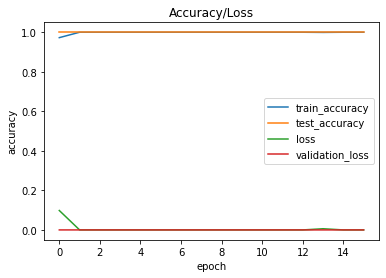

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Accuracy/Loss")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_accuracy','test_accuracy','loss', 'validation_loss'])
plt.show()